Student Name - Nishant Sahay
Student Number - 18200304

# Importing Dependencies#

In [1]:
import os
import sys
import json
import csv
import urllib.request as request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from itertools import combinations
import re
from nltk.collocations import *
from sklearn.feature_extraction.text import TfidfVectorizer

## Defining Constants

In [2]:
# Url to fetch data
api = "https://opendata.socrata.com/resource/q2te-8cvq.json?$order=:id&$limit=10000";
# Local CSV file name
filename = "Flight_Accidents.csv"
# Top results to be shown
top_result = 10
# Unknown constant
unknown = 'Unknown'

# Task 1: Identifying a suitable web api

In [3]:
#Check whether file already exist in local 
if not os.path.isfile(filename):
    #calling the api to get the data in json format
    data_csv = pd.read_json(api)
    #Saving the file in CSV format
    data_csv.to_csv(filename,index=False)

In [4]:
# Reading the saved file
df = pd.read_csv(filename)
df

,aboard,cn_in,date,fatalities,flight,ground,location,operator,registration,route,summary,time,type
0,2.0,1,-1934121600,1.0,NaN,0.0,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,"During a demonstration flight, a U.S. Army fly...",17:18,Wright Flyer III
1,5.0,NaN,-1813680000,5.0,NaN,0.0,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,First U.S. dirigible Akron exploded just offsh...,06:30,Dirigible
2,1.0,NaN,-1779984000,1.0,-,0.0,"Victoria, British Columbia, Canada",Private,NaN,NaN,The first fatal airplane accident in Canada oc...,NaN,Curtiss seaplane
3,20.0,NaN,-1777046400,14.0,NaN,0.0,Over the North Sea,Military - German Navy,NaN,NaN,The airship flew into a thunderstorm and encou...,18:30,Zeppelin L-1 (airship)
4,30.0,NaN,-1773763200,30.0,NaN,0.0,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Hydrogen gas which was being vented was sucked...,10:30,Zeppelin L-2 (airship)
5,41.0,NaN,-1730217600,21.0,NaN,0.0,"Tienen, Belgium",Military - German Navy,NaN,NaN,Crashed into trees while attempting to land af...,01:00,Zeppelin L-8 (airship)
6,19.0,NaN,-1714492800,19.0,NaN,0.0,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,"Exploded and burned near Neuwerk Island, when...",15:20,Zeppelin L-10 (airship)
7,20.0,NaN,-1686067200,20.0,NaN,0.0,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,"Crashed near the Black Sea, cause unknown.",NaN,Schutte-Lanz S-L-10 (airship)
8,22.0,NaN,-1681056000,22.0,NaN,0.0,"Billericay, England",Military - German Navy,NaN,NaN,Shot down by British aircraft crashing in flames.,01:00,Zeppelin L-32 (airship)
9,19.0,NaN,-1680451200,19.0,NaN,0.0,"Potters Bar, England",Military - German Navy,NaN,NaN,Shot down in flames by the British 39th Home D...,23:45,Zeppelin L-31 (airship)


The details of columns are:
1. aboard - Number of people on plane 
2. cn_in - Serial number of the plane
3. date - Date of the plane crash4.
4. fatalities -Number of people who died
5. flight - Name of the plane
6. ground - Number of fatalities on ground
7. location - Location of plane crash
8. operator - Operator of the plane
9. registration - Registration number of the plane
10. route - The route on which the flight was on
11. summary - Reason behind the plane crash
12. time - Timing of plane crash
13. type - Type of plane

## Preprocessing Data

In [5]:
df.dtypes.value_counts()

object     9
float64    3
int64      1
dtype: int64

### Handling missing values 

In [6]:
df.isnull().sum()

aboard            22
cn_in           1228
date               0
fatalities        12
flight          4199
ground            22
location          20
operator          18
registration     335
route           1706
summary          390
time            2219
type              27
dtype: int64

### Handling NaN in aboard

In [7]:
#Replacing with mean of operator
df['aboard']= df['aboard'].fillna(df.groupby('operator')['aboard'].transform('mean'))

In [8]:
# Printing the number of null
df.isnull().sum()
# Note : aboard had 22 values which were null now it is reduced to 2

aboard             2
cn_in           1228
date               0
fatalities        12
flight          4199
ground            22
location          20
operator          18
registration     335
route           1706
summary          390
time            2219
type              27
dtype: int64

In [9]:
# Showing values of aboard which are NaN
df[df['aboard'].isnull()]

,aboard,cn_in,date,fatalities,flight,ground,location,operator,registration,route,summary,time,type
3841,NaN,33070,610700400,10.0,NaN,0.0,"Near Tainjin, China",Aero Asahi,JA9596,NaN,NaN,NaN,Bell 412
4699,NaN,314,953712000,NaN,NaN,NaN,"Herreira, Spain",Military - Ejército del Aire,TM-12D-73,Sevilla - Herreira,Crashed while attempting to land in poor weather.,NaN,CASA 212-DE Aviocar 200


In [10]:
# Replacing the remaining NaN with the mean of entire aboard
df['aboard']=df['aboard'].fillna(df['aboard'].mean())

In [11]:
# After replacing with the mean of entire aboard column
df.isnull().sum()
# Note :- There are no NaN in aboard

aboard             0
cn_in           1228
date               0
fatalities        12
flight          4199
ground            22
location          20
operator          18
registration     335
route           1706
summary          390
time            2219
type              27
dtype: int64

In [12]:
# Converting datatype of aboard to int as it cannot contain fractions
df = df.astype({"aboard": int})

### Handling NaN in fatalities

In [13]:
#Replacing with mean of operator
df['fatalities']=df['fatalities'].fillna(df.groupby('operator')['fatalities'].transform('mean'))

In [14]:
# Printing the number of null
df.isnull().sum()
# Note : fatalities had 12 values which were null now it is reduced to 1

aboard             0
cn_in           1228
date               0
fatalities         1
flight          4199
ground            22
location          20
operator          18
registration     335
route           1706
summary          390
time            2219
type              27
dtype: int64

In [15]:
# Showing values of aboard which are NaN
df[df['fatalities'].isnull()]

,aboard,cn_in,date,fatalities,flight,ground,location,operator,registration,route,summary,time,type
4699,27,314,953712000,NaN,NaN,NaN,"Herreira, Spain",Military - Ejército del Aire,TM-12D-73,Sevilla - Herreira,Crashed while attempting to land in poor weather.,NaN,CASA 212-DE Aviocar 200


In [16]:
# Replacing the remaining NaN with the mean of entire aboard
df['fatalities']=df['fatalities'].fillna(df['fatalities'].mean())

In [17]:
# After replacing with the mean of entire fatalities column
df.isnull().sum()
# Note :- There are no NaN in fatalities

aboard             0
cn_in           1228
date               0
fatalities         0
flight          4199
ground            22
location          20
operator          18
registration     335
route           1706
summary          390
time            2219
type              27
dtype: int64

In [18]:
# Converting datatype of fatalities to int as it cannot contain fractions
df = df.astype({"fatalities": int})

### Handling NaN in Ground

In [19]:
#Replacing with mean of operator
df['ground']=df['ground'].fillna(df.groupby('operator')['ground'].transform('mean'))

In [20]:
# Printing the number of null
df.isnull().sum()
# Note : ground had 22 values which were null now it is reduced to 1

aboard             0
cn_in           1228
date               0
fatalities         0
flight          4199
ground             1
location          20
operator          18
registration     335
route           1706
summary          390
time            2219
type              27
dtype: int64

In [21]:
# Replacing the remaining NaN with the mean of entire ground
df['ground']=df['ground'].fillna(df['ground'].mean())

In [22]:
# After replacing with the mean of entire ground column
df.isnull().sum()
# Note :- There are no NaN in ground

aboard             0
cn_in           1228
date               0
fatalities         0
flight          4199
ground             0
location          20
operator          18
registration     335
route           1706
summary          390
time            2219
type              27
dtype: int64

In [23]:
# Converting datatype of ground to int as it cannot contain fractions
df = df.astype({"ground": int})

### Reformatting data which is in format of timestamp

In [24]:
df['date'].head(top_result)

0   -1934121600
1   -1813680000
2   -1779984000
3   -1777046400
4   -1773763200
5   -1730217600
6   -1714492800
7   -1686067200
8   -1681056000
9   -1680451200
Name: date, dtype: int64

In [25]:
df['date'] = pd.to_datetime(df['date'], unit='s')

In [26]:
df['date'].head(top_result)

0   1908-09-17 08:00:00
1   1912-07-12 08:00:00
2   1913-08-06 08:00:00
3   1913-09-09 08:00:00
4   1913-10-17 08:00:00
5   1915-03-05 08:00:00
6   1915-09-03 08:00:00
7   1916-07-28 08:00:00
8   1916-09-24 08:00:00
9   1916-10-01 08:00:00
Name: date, dtype: datetime64[ns]

### Replacing NaN in all columns

In [27]:
df = df.replace(np.NaN, unknown)
df

,aboard,cn_in,date,fatalities,flight,ground,location,operator,registration,route,summary,time,type
0,2,1,1908-09-17 08:00:00,1,Unknown,0,"Fort Myer, Virginia",Military - U.S. Army,Unknown,Demonstration,"During a demonstration flight, a U.S. Army fly...",17:18,Wright Flyer III
1,5,Unknown,1912-07-12 08:00:00,5,Unknown,0,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown,Test flight,First U.S. dirigible Akron exploded just offsh...,06:30,Dirigible
2,1,Unknown,1913-08-06 08:00:00,1,-,0,"Victoria, British Columbia, Canada",Private,Unknown,Unknown,The first fatal airplane accident in Canada oc...,Unknown,Curtiss seaplane
3,20,Unknown,1913-09-09 08:00:00,14,Unknown,0,Over the North Sea,Military - German Navy,Unknown,Unknown,The airship flew into a thunderstorm and encou...,18:30,Zeppelin L-1 (airship)
4,30,Unknown,1913-10-17 08:00:00,30,Unknown,0,"Near Johannisthal, Germany",Military - German Navy,Unknown,Unknown,Hydrogen gas which was being vented was sucked...,10:30,Zeppelin L-2 (airship)
5,41,Unknown,1915-03-05 08:00:00,21,Unknown,0,"Tienen, Belgium",Military - German Navy,Unknown,Unknown,Crashed into trees while attempting to land af...,01:00,Zeppelin L-8 (airship)
6,19,Unknown,1915-09-03 08:00:00,19,Unknown,0,"Off Cuxhaven, Germany",Military - German Navy,Unknown,Unknown,"Exploded and burned near Neuwerk Island, when...",15:20,Zeppelin L-10 (airship)
7,20,Unknown,1916-07-28 08:00:00,20,Unknown,0,"Near Jambol, Bulgeria",Military - German Army,Unknown,Unknown,"Crashed near the Black Sea, cause unknown.",Unknown,Schutte-Lanz S-L-10 (airship)
8,22,Unknown,1916-09-24 08:00:00,22,Unknown,0,"Billericay, England",Military - German Navy,Unknown,Unknown,Shot down by British aircraft crashing in flames.,01:00,Zeppelin L-32 (airship)
9,19,Unknown,1916-10-01 08:00:00,19,Unknown,0,"Potters Bar, England",Military - German Navy,Unknown,Unknown,Shot down in flames by the British 39th Home D...,23:45,Zeppelin L-31 (airship)


In [28]:
# After replacing with unknown all the columns are free from NaN
df.isnull().sum()

aboard          0
cn_in           0
date            0
fatalities      0
flight          0
ground          0
location        0
operator        0
registration    0
route           0
summary         0
time            0
type            0
dtype: int64

### Removing unwanted characters in flight column

In [29]:
# Printing unique values of flight
np.unique(df['flight'])

array(['-', '002', '004', '005', '006', '007', '009', '0126', '032',
       '033', '035', '045', '046', '052', '053', '072', '075', '086',
       '091', '1', '1-10', '1-11', '1-6-6A', '10', '100', '1008', '101',
       '1016', '101A', '102', '1023', '103', '1030X', '1039', '104',
       '1047', '105', '106', '107', '108', '11', '11-8', '110', '1103',
       '111', '112', '1121', '113', '114', '1141', '1145', '115', '1153',
       '1154', '116', '117', '12', '120', '121', '123', '1248', '125',
       '1278', '128', '1288', '129', '13', '130', '1301', '1303', '133',
       '134', '1363', '137', '139', '14', '140', '141', '142', '1420',
       '1422', '143', '145', '1455', '148', '149', '1493/5569', '15',
       '150', '1501', '151', '1517', '152', '153', '1549', '1553', '157',
       '158', '159', '15A', '16', '160', '1602', '161', '1611', '162',
       '1624', '1627', '1629', '163', '1644', '1658', '166', '168', '16B',
       '17', '1712', '1713', '173', '1736/4805', '1746', '175', '175

In [30]:
# The flight column has '-' which needs to be replaced with unknown
df['flight'] = df['flight'].replace('-',unknown)

In [31]:
# Printing unique values of flight after replacement
np.unique(df['flight'])

array(['002', '004', '005', '006', '007', '009', '0126', '032', '033',
       '035', '045', '046', '052', '053', '072', '075', '086', '091', '1',
       '1-10', '1-11', '1-6-6A', '10', '100', '1008', '101', '1016',
       '101A', '102', '1023', '103', '1030X', '1039', '104', '1047',
       '105', '106', '107', '108', '11', '11-8', '110', '1103', '111',
       '112', '1121', '113', '114', '1141', '1145', '115', '1153', '1154',
       '116', '117', '12', '120', '121', '123', '1248', '125', '1278',
       '128', '1288', '129', '13', '130', '1301', '1303', '133', '134',
       '1363', '137', '139', '14', '140', '141', '142', '1420', '1422',
       '143', '145', '1455', '148', '149', '1493/5569', '15', '150',
       '1501', '151', '1517', '152', '153', '1549', '1553', '157', '158',
       '159', '15A', '16', '160', '1602', '161', '1611', '162', '1624',
       '1627', '1629', '163', '1644', '1658', '166', '168', '16B', '17',
       '1712', '1713', '173', '1736/4805', '1746', '175', '1750', '

### Removing unwanted characters in time column

In [32]:
# Printing unique values of time
np.unique(df['time'])

array(['00:00', '00:01', '00:02', ..., 'c: 9:40', 'c:09:00', 'c:17:00'],
      dtype=object)

In [33]:
df['time'] = df['time'].replace('c: 1:00','1:00')
df['time'] = df['time'].replace('c: 2:00','2:00')
df['time'] = df['time'].replace('c: 9:40','9:40')
df['time'] = df['time'].replace('c:09:00','09:00')
df['time'] = df['time'].replace('c:17:00','17:00')
df['time'] = df['time'].replace('c14:30','14:30')
df['time'] = df['time'].replace('c16:50','16:50')
df['time'] = df['time'].replace('18.40','18:40')
df['time'] = df['time'].replace("22'08",'22:08')
df['time'] = df['time'].replace("12'20",'12:20')
df['time'] = df['time'].replace("0943",'09:43')

In [34]:
# Printing unique values of time after replacement
np.unique(df['time'])

array(['00:00', '00:01', '00:02', '00:03', '00:04', '00:05', '00:08',
       '00:12', '00:13', '00:15', '00:16', '00:20', '00:22', '00:23',
       '00:25', '00:28', '00:30', '00:31', '00:32', '00:33', '00:34',
       '00:35', '00:36', '00:39', '00:45', '00:47', '00:50', '00:51',
       '00:52', '00:54', '00:55', '00:56', '00:57', '00:58', '01:00',
       '01:04', '01:05', '01:10', '01:11', '01:13', '01:14', '01:15',
       '01:16', '01:17', '01:20', '01:22', '01:23', '01:24', '01:25',
       '01:28', '01:29', '01:30', '01:36', '01:37', '01:38', '01:40',
       '01:42', '01:43', '01:45', '01:46', '01:50', '01:52', '01:55',
       '01:56', '01:58', '02:00', '02:01', '02:03', '02:04', '02:05',
       '02:06', '02:07', '02:08', '02:09', '02:11', '02:13', '02:14',
       '02:15', '02:17', '02:19', '02:20', '02:22', '02:23', '02:25',
       '02:28', '02:30', '02:32', '02:35', '02:36', '02:38', '02:40',
       '02:42', '02:47', '02:48', '02:50', '02:52', '02:55', '02:56',
       '03:00', '03:

## Visualizing to analyze data

### Location wise Accidents

In [35]:
#Grouping location and counting number of accidents
location_group = pd.DataFrame({'count' : df[['location']].groupby(['location'])['location'].count()}).reset_index()
# Sorting in descending order based on count
location_group = location_group.sort_values(by=['count'], ascending=False).iloc[1:]
location_group.head(top_result)

,location,count
1709,"Moscow, Russia",15
3780,"Sao Paulo, Brazil",15
3639,"Rio de Janeiro, Brazil",14
1548,"Manila, Philippines",13
317,"Bogota, Colombia",13
76,"Anchorage, Alaska",13
409,"Cairo, Egypt",12
2972,"New York, New York",12
538,"Chicago, Illinois",11
4028,"Tehran, Iran",9


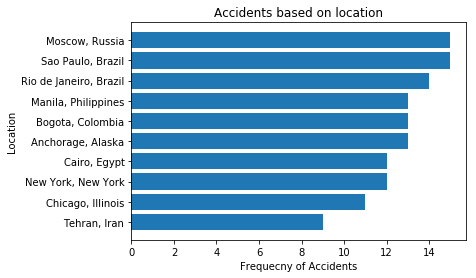

In [36]:
# Bar chart showing Number of Accidents based on location 
X = np.flip(location_group['location'].values[0:10],axis=0)
y_pos = np.arange(len(X))
Y = np.flip(location_group['count'].values[0:10],axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Location')
plt.xlabel('Frequecny of Accidents')
plt.title('Accidents based on location')
plt.show()

### Operator wise Accidents

In [37]:
#Grouping Operator and counting number of accidents
operator_group = pd.DataFrame({'count' : df[['operator']].groupby(['operator'])['operator'].count()}).reset_index()
# Sorting in descending order based on count
operator_group = operator_group.sort_values(by=['count'], ascending=False).iloc[:]
operator_group

,operator,count
84,Aeroflot,179
1559,Military - U.S. Air Force,176
197,Air France,70
838,Deutsche Lufthansa,65
732,China National Aviation Corporation,44
2343,United Air Lines,44
268,Air Taxi,44
1571,Military - U.S. Army Air Forces,43
1757,Pan American World Airways,41
1577,Military - U.S. Navy,36


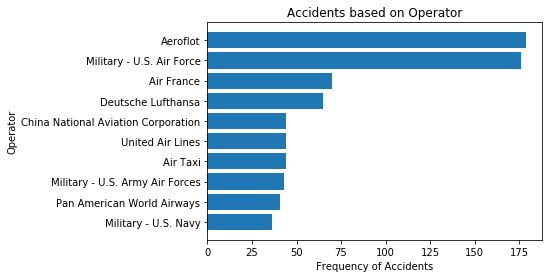

In [38]:
# Bar chart showing Number of Accidents based on Operator
X = np.flip(operator_group['operator'].values[0:10],axis=0)
y_pos = np.arange(len(X))
Y = np.flip(operator_group['count'].values[0:10],axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Operator')
plt.xlabel('Frequency of Accidents')
plt.title('Accidents based on Operator')
plt.show()

### Flight type wise Accidents

In [39]:
#Grouping Operator and counting number of accidents
type_group = pd.DataFrame({'count' : df[['type']].groupby(['type'])['type'].count()}).reset_index()
# Sorting in descending order based on type
type_group = type_group.sort_values(by=['count'], ascending=False).iloc[:]
type_group

,type,count
1178,Douglas DC-3,334
2389,de Havilland Canada DHC-6 Twin Otter 300,81
1097,Douglas C-47A,74
1089,Douglas C-47,62
1230,Douglas DC-4,40
2341,Yakovlev YAK-40,37
125,Antonov AN-26,36
1598,Junkers JU-52/3m,32
1119,Douglas C-47B,29
1045,De Havilland DH-4,28


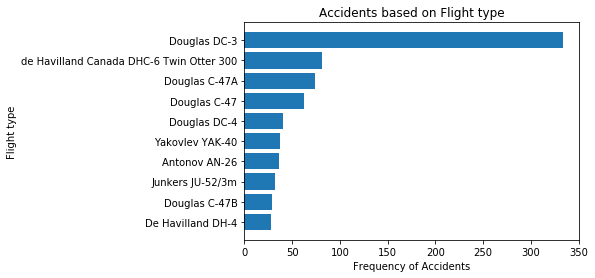

In [40]:
# Bar chart showing Number of Accidents based on type
X = np.flip(type_group['type'].values[0:10],axis=0)
y_pos = np.arange(len(X))
Y = np.flip(type_group['count'].values[0:10],axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Flight type')
plt.xlabel('Frequency of Accidents')
plt.title('Accidents based on Flight type')
plt.show()

### Route wise Accidents

In [41]:
#Grouping route and counting number of accidents
route_group = pd.DataFrame({'count' : df[['route']].groupby(['route'])['route'].count()}).reset_index()
# Sorting in descending order based on type
route_group = route_group.sort_values(by=['count'], ascending=False).iloc[5:]
route_group

,route,count
2711,Sao Paulo - Rio de Janeiro,5
3145,Villavicencio - Mitu,4
385,Bogota - Barranquilla,4
2576,Saigon - Paris,4
2710,Sao Paulo - Porto Alegre,4
244,Bangkok - Hong Kong,3
1519,Lagos - Abuja,3
1120,Guayaquil - Quito,3
810,Davao - Manila,3
828,Demonstration,3


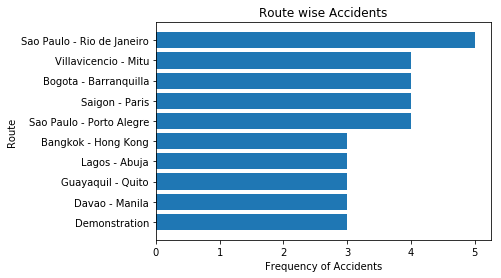

In [42]:
# Bar chart showing Number of Accidents based on type
X = np.flip(route_group['route'].values[0:10],axis=0)
y_pos = np.arange(len(X))
Y = np.flip(route_group['count'].values[0:10],axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Route')
plt.xlabel('Frequency of Accidents')
plt.title('Route wise Accidents')
plt.show()

###  Grouping decade wise Accidents

In [43]:
start = 1901
group = 10
list_year = []
list_crash = []
crash_sum_list = []
list_timestamp = list(df['date'])
x_range = []

#Extracting year from timestamp
for dates in list_timestamp:
    list_year.append(dates.year)

#Extracting unique years form the yearList
unique_years = list(np.unique(list_year))

#Counting the number of crashes using unique year list
for year in unique_years:
    list_crash.append(list_year.count(year))

#Summing the values in a decade
for i in range(0,11):
    end = start + group
    year_range = list(range(start,end))
    crash_sum = 0
    for year in year_range:
        if year in unique_years:
            crash_sum = crash_sum + list_crash[unique_years.index(year)]
    crash_sum_list.append(crash_sum)
    x_range.append(str(year_range[0])+" - " + str(year_range[len(year_range)-1])) 
    start = year_range[len(year_range)-1] + 1

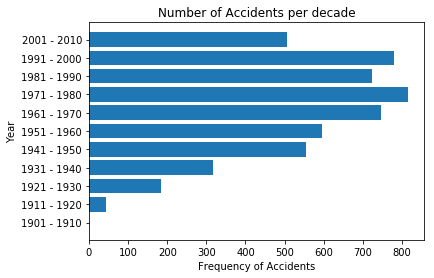

In [44]:
# Bar chart showing Number of Accidents in a decade
X = x_range
y_pos = np.arange(len(X))
Y = crash_sum_list
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Year')
plt.xlabel('Frequency of Accidents')
plt.title('Number of Accidents per decade')
plt.show()

### Number of accidents in different time slot

In [45]:
# Creating 6 hours range
time_range = ['0:00 - 5:59','6:00 - 11:59','12:00 - 17:59','18:00 - 23:59']
time_range_count = [0,0,0,0]
time = df[df['time']!=unknown]['time']
# Counting number of accidents in each time slot
for t in time:
    hours = int(t.split(':')[0])
    if(hours>=0 and hours < 6):
        time_range_count[0]+=1
    elif(hours>=6 and hours <12):
        time_range_count[1]+=1
    elif(hours>=12 and hours <18):
        time_range_count[2]+=1
    else:
        time_range_count[3]+=1

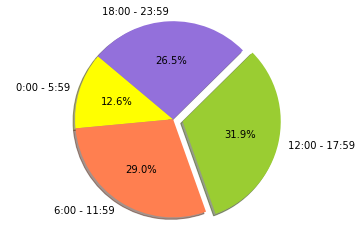

In [46]:
# Pie chart showing accidents in different time slots
labels = time_range
sizes = time_range_count
colors = ['yellow', 'coral','yellowgreen', 'mediumpurple']
    
explode = [0] * len(labels)  # explode 1st slice
explode[2] =0.1
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Text analysis on summary column

### Preprocessing Text

In [47]:
def preprocessing(text):
    #text = text.decode("utf8")
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]

    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]
    
    # lower capitalization
    tokens = [word.lower() for word in tokens]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

### Calculating co-occurences

In [48]:
def co_occurrences(documents, terms):
    """Return mapping from pairs of search terms to a count of documents
    containing both terms.

    """
    # Ensure that longer terms match in preference to shorter terms
    # that happen to be initial substrings.
    terms = sorted(terms, key=len, reverse=True)
    # Regular expression matching any of the terms, as complete words.
    search = re.compile(r'\b(?:{})\b'.format('|'.join(map(re.escape, terms))))
    result = Counter()
    for document in documents:
        matches = sorted(set(search.findall(document)))
        result.update(combinations(matches, 2))
    return result

In [49]:
word_list = []
processed = df[df['summary']!= unknown]['summary']
for data in processed:
    word_list.append(preprocessing(data))

### TF-IDF vector to remove frequent words

In [50]:
vectorizer = TfidfVectorizer(max_features=80)
X = vectorizer.fit_transform(word_list)
frequent_words = vectorizer.get_feature_names()
frequent_words.remove('the');

### Calculating co-occurences of words coming together

In [51]:
word = co_occurrences(word_list, frequent_words)
word.most_common()

[(('aircraft', 'crashed'), 1059),
 (('crashed', 'plane'), 957),
 (('crashed', 'pilot'), 644),
 (('crashed', 'flight'), 535),
 (('aircraft', 'pilot'), 497),
 (('aircraft', 'plane'), 491),
 (('approach', 'crashed'), 488),
 (('crashed', 'engine'), 469),
 (('crashed', 'failure'), 443),
 (('crashed', 'runway'), 432),
 (('aircraft', 'flight'), 427),
 (('crashed', 'taking'), 407),
 (('cargo', 'plane'), 405),
 (('airport', 'crashed'), 401),
 (('crashed', 'crew'), 390),
 (('pilot', 'plane'), 383),
 (('crashed', 'mountain'), 380),
 (('aircraft', 'runway'), 379),
 (('aircraft', 'crew'), 375),
 (('crashed', 'land'), 355),
 (('crashed', 'landing'), 352),
 (('crashed', 'mile'), 351),
 (('altitude', 'crashed'), 349),
 (('aircraft', 'approach'), 349),
 (('aircraft', 'failure'), 348),
 (('crashed', 'weather'), 345),
 (('aircraft', 'engine'), 338),
 (('condition', 'crashed'), 337),
 (('crashed', 'takeoff'), 336),
 (('attempting', 'crashed'), 328),
 (('engine', 'plane'), 308),
 (('aircraft', 'altitude'),

### Extracting Pointwise mutual information

In [52]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_list)
finder.apply_freq_filter(2) #Change the frequency here
scored = finder.score_ngrams(bigram_measures.pmi)
print(finder.nbest(bigram_measures.pmi, 10))

[('shot anti-aircraft fire normandy invasion', 'shot anti-aircraft fire normandy invasion'), ('shot japanese military aircraft', 'shot japanese military aircraft')]


## Observations

1. It is evident that Douglas DC-3 flight type has significantly higher number of crashes than other flight types. 
   So, the techical specifications and hardware parts of the flight can be checked and proper modifications can be
   made if required.
2. The route Sao paula - Rio De Jeneiro is probably the most dangerous route. A detailed study with more parameters like
   wind, rain,and other external factors may help in explaining what is causing these crashes
3. It can be seen that the number of crashes are maximum in between the decade 1961-1970 despite the fact the with the advancement of time, number of flights has always increased. This may be due to the technological advancement in the field of aviation as a resuly of which number of accidents have reduced significantly.

## Tentative conclusion

After analyzing the summary of plane crashes we can conclude that further analysis needs to be done in order to find the solid reason and pattern behind plane crashes. However, using text analytics we get a hint that the top incidents behind the plane crashes could be:
1. Japanese aircrafts being shot. This may be during the period of world war
2. Many planes have crashed while landing on runway. There could be several possibilities including pilot's error
3. Weather can also be a big factor as it has appeared frequently after calculating poinwise mutual information(pmi).